In [284]:
import math
import numpy as np
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_style("ticks")
sns.set_context("paper")
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [285]:
df = pd.read_csv('../prof_fine.csv')
df

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
0,11,0.0,0.0,0.000,0.000,<frozen importlib._bootstrap>:35(_new_module)
1,17,0.0,0.0,0.000,0.000,<frozen importlib._bootstrap>:58(__init__)
2,27,0.0,0.0,0.000,0.000,<frozen importlib._bootstrap>:87(acquire)
3,27,0.0,0.0,0.000,0.000,<frozen importlib._bootstrap>:112(release)
4,17,0.0,0.0,0.000,0.000,<frozen importlib._bootstrap>:152(__init__)
...,...,...,...,...,...,...
976,1,0.0,0.0,0.002,0.002,runpy.py:1(<module>)
977,1,0.0,0.0,0.000,0.000,pkgutil.py:195(ImpImporter)
978,1,0.0,0.0,0.000,0.000,pkgutil.py:269(ImpLoader)
979,1,0.0,0.0,0.001,0.001,pkgutil.py:1(<module>)


In [286]:
df['filename:lineno(function)'].str.replace('(', ':').str.replace(')', ':').str.split(':',
                                                                                      expand=True).drop(
    columns=[1, 3]).iloc[521]

0    inference.py
2     is_hashable
Name: 521, dtype: object

In [287]:
# split filename:lineno(function) into 3 columns first split is : second is (
# third is )
df[['file', 'function']] = df['filename:lineno(function)'].str.replace('(', ':').str.replace(')', ':').str.split(':',
                                                                                                                 expand=True).drop(
    columns=[1, 3])
# if function is empty then it is the file
df['function'] = df['function'].fillna("internal")
# df = df.drop(columns=['filename:lineno(function)'])
df['file_function'] = df['file'] + ':' + df['function']
# df = df.drop(columns=['file', 'function'])

In [288]:
# sort by tottime and select 90% of the data
df = df.sort_values('tottime', ascending=False).head(10)
n_images = 73

In [289]:
suffix = '_fine'
print(df[['ncalls', 'tottime', 'file_function']].to_latex(index=False, escape=True,
                                                          caption='Top 10 functions by Total running time for all 73 images',
                                                          label='tab:top10' + suffix, float_format='%.3f',
                                                          position="h", header=['Calls to the function', 'Total '
                                                                                                         'running time (s)',
                                                                                'file:function']))

\begin{table}[h]
\caption{Top 10 functions by Total running time for all 73 images}
\label{tab:top10_fine}
\begin{tabular}{lrl}
\toprule
Calls to the function & Total running time (s) & file:function \\
\midrule
36316 & 3.695 & match\_three\_d.py:loss \\
131999 & 2.730 & \{function KDTree.query at 0x12fa6cf70\}:internal \\
715849 & 2.129 & \{method 'reduce' of 'numpy.ufunc' objects\}:internal \\
36378 & 0.714 & \_methods.py:\_var \\
36316 & 0.658 & \_kdtree.py:\_\_init\_\_ \\
108913 & 0.530 & linalg.py:norm \\
36316 & 0.515 & arraysetops.py:\_unique1d \\
328452 & 0.455 & \{built-in method numpy.array\}:internal \\
251549 & 0.423 & fromnumeric.py:\_wrapreduction \\
263998 & 0.412 & fromnumeric.py:\_wrapit \\
\bottomrule
\end{tabular}
\end{table}



In [267]:
df['tottime'] = df['tottime'] / n_images

\begin{table}
\caption{Top 10 functions by Total running time}
\label{tab:top10_rough}
\begin{tabular}{lrl}
\toprule
ncalls & tottime & file\_function \\
\midrule
2661120/1330560 & 0.181 & numeric.py:roll \\
3878 & 0.146 & \{imread\}:internal \\
3696 & 0.119 & contour\_service.py:custom\_uniform\_interpolation \\
1848 & 0.062 & contour\_service.py:calculate\_roll \\
4938 & 0.056 & \{built-in method builtins.sorted\}:internal \\
58400 & 0.051 & \{matchShapes\}:internal \\
1 & 0.024 & \{built-in method \_pickle.load\}:internal \\
1332896 & 0.020 & numeric.py:normalize\_axis\_tuple \\
1332504 & 0.010 & \{method 'reshape' of 'numpy.ndarray' objects\}:internal \\
665280 & 0.010 & function\_base.py:flip \\
\bottomrule
\end{tabular}
\end{table}



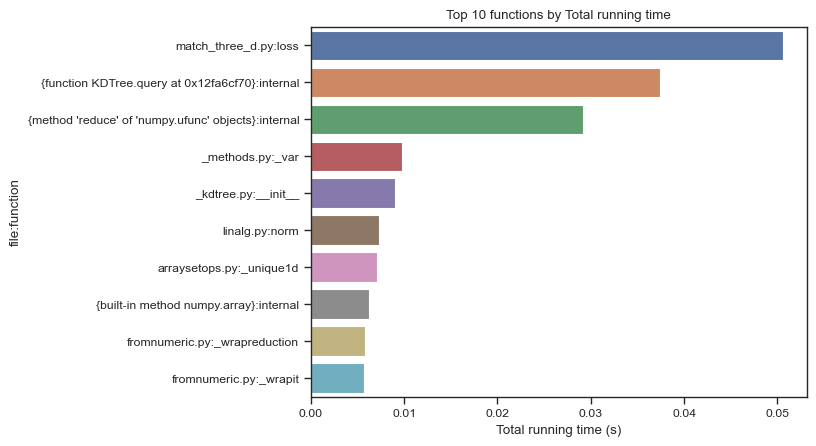

In [241]:
sns.barplot(x='tottime', y='file_function', data=df);
plt.title('Top 10 functions by Total running time');
plt.xlabel('Total running time (s)');
plt.ylabel('file:function');
plt.show()

In [247]:
df = pd.read_csv('../prof_vertices.csv', sep=';')

In [248]:
df

,function,ncalls,tottime
0,calc_vertices,73,0.631250
1,calc_vertices>douglas_peucker,18145,0.273611
2,calc_vertices>point_to_line_distance,26256,0.168750
3,filter2,146,0.243056
4,cross,26256,0.158333
5,bwboundaries,73,0.129167
6,mean,17366,0.084000
7,calc_vertices>init_reduction,73,0.086806
8,bwlabel,73,0.042000
9,ipermute,24767,0.090000


In [290]:
suffix = '_vertices'
print(df[['ncalls', 'tottime', 'function']].to_latex(index=False, escape=True,
                                                     caption='Top 10 functions by Total running time for all 73 images',
                                                     label='tab:top10' + suffix, float_format='%.3f',
                                                     position="h", header=['Calls to the function', 'Total '
                                                                                                    'running time (s)',
                                                                           'file:function']))

\begin{table}[h]
\caption{Top 10 functions by Total running time for all 73 images}
\label{tab:top10_vertices}
\begin{tabular}{lrl}
\toprule
Calls to the function & Total running time (s) & file:function \\
\midrule
36316 & 3.695 & loss \\
131999 & 2.730 & internal \\
715849 & 2.129 & internal \\
36378 & 0.714 & \_var \\
36316 & 0.658 & \_\_init\_\_ \\
108913 & 0.530 & norm \\
36316 & 0.515 & \_unique1d \\
328452 & 0.455 & internal \\
251549 & 0.423 & \_wrapreduction \\
263998 & 0.412 & \_wrapit \\
\bottomrule
\end{tabular}
\end{table}



In [249]:
df = df.sort_values('tottime', ascending=False).head(10)

In [250]:
df['tottime'] = df['tottime'] / n_images

In [251]:
df

,function,ncalls,tottime
0,calc_vertices,73,0.008647
1,calc_vertices>douglas_peucker,18145,0.003748
3,filter2,146,0.003330
2,calc_vertices>point_to_line_distance,26256,0.002312
4,cross,26256,0.002169
5,bwboundaries,73,0.001769
9,ipermute,24767,0.001233
7,calc_vertices>init_reduction,73,0.001189
6,mean,17366,0.001151
10,readAscImage,73,0.001027


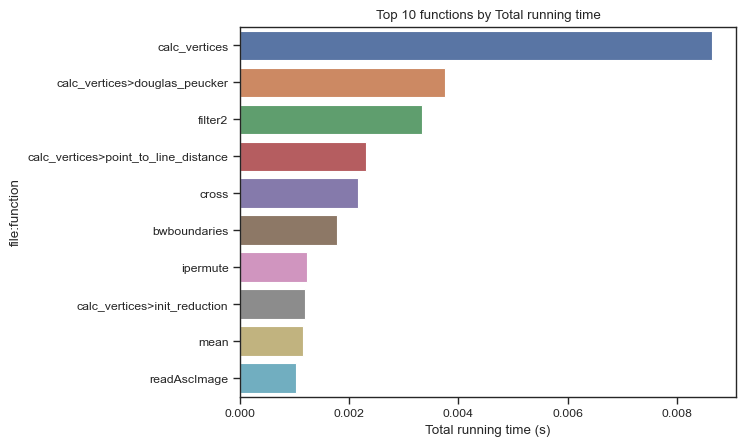

In [253]:
sns.barplot(x='tottime', y='function', data=df);
plt.title('Top 10 functions by Total running time');
plt.xlabel('Total running time (s)');
plt.ylabel('file:function');
plt.show()